In [1]:
from IPython.core.display import display, HTML
# 노트북 컨테이너 크기 조절
display(HTML("<style>#notebook-container {width: 90% !important; }</style>"))
# 마크다운 폰트
display(HTML("<style>.rendered_html{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# DataFrame 테이블 폰트
display(HTML("<style>.rendered_html table{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# 출력창 폰트
display(HTML("<style>pre{font-family: 'D2Coding', font-size: 16pt;}.rendered_html>ul>li{margin: 10px}</style>"))
display(HTML("<style>div.output_area>pre, div.output_subarea>pre{font-size: 16pt !important; line-height: 140%;}</style>"))
# 코드셀 폰트
display(HTML("<style> .CodeMirror pre {font-family: 'D2Coding'; font-size: 18pt !important; line-height: 140%;}</style>"))

# 패키지 설치

In [27]:
!pip install mySUNI

## 모듈 import

In [19]:
!pip install seaborn

In [24]:
!pip install certifi

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from mySUNI import cds
from IPython.display import Image

## 실습에 활용할 데이터셋

### 타이타닉: 탑승객의 사망자와 생존자 데이터 분석

In [2]:
Image('https://www.gukjenews.com/news/photo/201912/1212183_991659_1921.jpg')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

In [3]:
Image('https://1.bp.blogspot.com/-vTBB13E6mtA/WzmniMnyWnI/AAAAAAACzLs/4EL_VcYCGZoO1z2QLLAIqlnO4GlYbZdZACLcBGAs/s1600/1_32.jpg')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

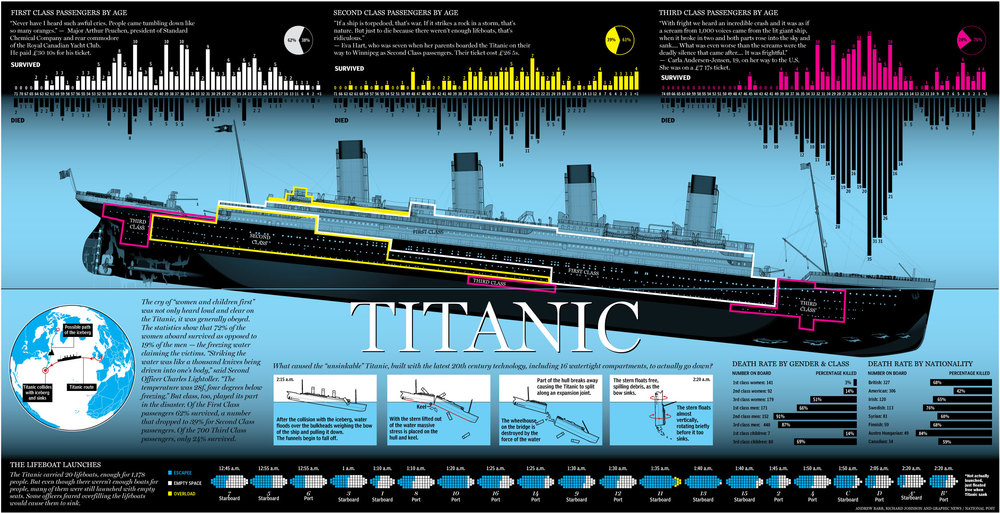

In [6]:
Image('https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg')

건조 당시 세계 최대의 여객선이었지만,**1912년의 최초이자 최후의 항해 때 빙산과 충돌해 침몰한 비운의 여객선**. 아마도 세상에서 가장 유명한 여객선이자 침몰선일 것입니다. 

침몰한 지 100년이 넘었지만 아직까지 세계에서 가장 유명한 침몰선입니다. 

사망자 수는 1위는 아니지만, 세계적으로 유명한 영화의 영향도 있고, 당시 최첨단 기술에 대해 기대감이 컸던 사회에 큰 영향을 끼치기도 한데다가, 근대 사회에서 들어서자마자 얼마 안된, 그리고 **유명인사들이 여럿 희생된 대참사**이기 때문에 가장 유명한 침몰선이 되었습니다. 또한 이 사건을 기점으로 여러가지 안전 조약들이 생겨났으니 더더욱 그렇습니다.

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 컬럼 (column) 설명 

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

### 데이터 분석!

**주요 목표**
- Pandas를 활용하여 타이타닉호 생존자, 사망자 **데이터를 분석**합니다.
- 데이터를 토대로 생존율이 높은 승객, 생존율이 낮은 승객은 누구인지 판단합니다.

## head() 앞 부분 / tail() 뒷 부분 조회

- default 옵션 값으로 5개의 행이 조회됩니다.
- 괄호 안에 숫자를 넣어 명시적으로 조회하고 싶은 행의 갯수를 지정할 수 있습니다.

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [17]:
# 앞부분 10개를 조회하세요.
df.head(10)

NameError: name 'df' is not defined

In [12]:
# 뒷부분 10개를 조회하세요.
df.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


## info()

- 컬럼별 정보(information)를 보여줍니다.
- 데이터의 갯수, 그리고 데이터 타입(dtype)을 확인할 때 사용합니다.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


**object** 타입은 쉽게 문자열이라고 생각하면 됩니다.

그런데, **category** 타입도 있습니다. category 타입은 문자열이지만, '남자' / '여자'처럼 카테고리화 할 수 있는 컬럼을 의미 합니다. 나중에 별도로 다루겠습니다.

## describe()

- 각 컬럼에 대한 요약 통계 제공
- 수치형 컬럼 (numerical column)의 통계를 기본으로 보여 줍니다.

In [14]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


categorical column (문자열 컬럼)에 적용해 볼 수 없지 않습니다.

아래와 같이 `include='object'`를 통해 categorical column에 대한 요약 통계를 확인할 수 있습니다.

In [15]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


## value_counts()

column 별 **값의 분포를 확인**할 때 사용합니다.

**남자, 여자, 아이의 데이터 분포를 확인**하고 싶다면 다음과 같이 실행합니다.

In [16]:
df.value_counts() # 같은 행이 몇개 있는지
# DataFrame을 대상

survived  pclass  sex     age    sibsp  parch  fare      embarked  class   who    adult_male  deck  embark_town  alive  alone
1         1       female  24.00  0      0      69.3000   C         First   woman  False       B     Cherbourg    yes    True     2
          3       male    32.00  0      0      8.0500    S         Third   man    True        E     Southampton  yes    True     1
0         3       female  29.00  1      1      10.4625   S         Third   woman  False       G     Southampton  no     False    1
1         1       female  17.00  1      0      57.0000   S         First   woman  False       B     Southampton  yes    False    1
                          16.00  0      1      57.9792   C         First   woman  False       B     Cherbourg    yes    False    1
                                               39.4000   S         First   woman  False       D     Southampton  yes    False    1
                                        0      86.5000   S         First   woman  False 

In [6]:
df['who'].value_counts(normalize=True)
# Series을 대상 

man      0.602694
woman    0.304153
child    0.093154
Name: who, dtype: float64

### 연습문제

`embark_town`은 승객의 탑승 항구를 나타내는 column 입니다. 탑승 항구별 승객 데이터 분포를 확인해 주세요.

In [18]:
# 코드를 입력해 주세요


Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

## 속성: Attributes

속성 값은 **함수형으로 조회하지 않습니다.**

자주 활용하는 DataFrame은 **속성 값**들은 다음과 같습니다.

- ndim
- shape
- index
- columns
- values
- T

**차원**을 나타냅니다. DataFrame은 2가 출력됩니다.

In [20]:
df.ndim

2

**(행, 열)** 순서로 출력됩니다.

In [21]:
df.shape

(891, 15)

index는 기본 설정된 **RangeIndex가 출력**됩니다.

In [22]:
df.index

RangeIndex(start=0, stop=891, step=1)

columns는 **열**을 출력 합니다. 

In [23]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

values는 모든 값을 출력하며, **numpy array 형식으로 출력**됩니다.

In [24]:
df.values

array([[0, 3, 'male', ..., 'Southampton', 'no', False],
       [1, 1, 'female', ..., 'Cherbourg', 'yes', False],
       [1, 3, 'female', ..., 'Southampton', 'yes', True],
       ...,
       [0, 3, 'female', ..., 'Southampton', 'no', False],
       [1, 1, 'male', ..., 'Cherbourg', 'yes', True],
       [0, 3, 'male', ..., 'Queenstown', 'no', True]], dtype=object)

T: **전치 (Transpose)** 는 Index와 Column의 축을 교환합니다.

In [25]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890
survived,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3,2,2,3,1,3,3,3,1,3,3,1,1,3,2,1,1,3,3,3,3,3,2,3,2,3,3,3,3,3,3,...,2,1,3,3,3,3,3,2,1,3,3,3,1,2,3,1,1,3,3,3,2,1,3,2,2,2,1,3,3,3,1,1,3,2,3,3,3,3,1,2,3,3,2,3,3,2,1,3,1,3
sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female,male,male,female,male,female,female,male,male,female,male,male,female,female,male,male,male,male,male,female,female,female,female,male,female,female,male,male,female,male,female,...,male,female,male,male,male,male,male,male,female,male,male,female,female,female,female,female,male,female,male,male,male,female,female,male,female,female,male,male,male,male,female,male,male,female,female,male,male,male,female,female,male,female,male,male,female,male,female,female,male,male
age,22,38,26,35,35,NaN,54,2,27,14,4,58,20,39,14,55,2,NaN,31,NaN,35,34,15,28,8,38,NaN,19,NaN,NaN,40,NaN,NaN,66,28,42,NaN,21,18,14,40,27,NaN,3,19,NaN,NaN,NaN,NaN,18,...,16,30,34.5,17,42,NaN,35,28,NaN,4,74,9,16,44,18,45,51,24,NaN,41,21,48,NaN,24,42,27,31,NaN,4,26,47,33,47,28,15,20,19,NaN,56,25,33,22,28,25,39,27,19,NaN,26,32
sibsp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0,0,0,0,0,3,1,0,3,0,0,0,1,0,0,1,1,0,0,2,1,1,1,0,1,0,0,1,0,2,1,...,0,0,0,0,0,8,0,0,1,4,0,1,0,1,0,1,0,0,0,2,1,0,8,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0,0,0,0,0,1,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,2,0,1,1,0,1,1,0,3,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,5,0,0,2,0,0
fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16,29.125,13,18,7.225,26,13,8.0292,35.5,21.075,31.3875,7.225,263,7.8792,7.8958,27.7208,146.521,7.75,10.5,82.1708,52,7.2292,8.05,18,11.2417,9.475,21,7.8958,41.5792,7.8792,8.05,15.5,7.75,21.6792,17.8,...,10.5,31,6.4375,8.6625,7.55,69.55,7.8958,33,89.1042,31.275,7.775,15.2458,39.4,26,9.35,164.867,26.55,19.2583,7.2292,14.1083,11.5,25.9292,69.55,13,13,13.8583,50.4958,9.5,11.1333,7.8958,52.5542,5,9,24,7.225,9.8458,7.8958,7.8958,83.1583,26,7.8958,10.5167,10.5,7.05,29.125,13,30,23.45,30,7.75
embarked,S,C,S,S,S,Q,S,S,S,C,S,S,S,S,S,S,Q,S,S,C,S,S,Q,S,S,S,C,S,Q,S,C,C,Q,S,C,S,C,S,S,C,S,S,C,C,Q,S,Q,Q,C,S,...,S,C,C,S,S,S,C,S,C,S,S,C,S,S,S,S,S,C,C,S,S,S,S,S,S,C,S,S,S,S,S,S,S,C,C,S,S,S,C,S,S,S,S,S,Q,S,S,S,C,Q
class,Third,First,Third,First,Third,Third,First,Third,Third,Second,Third,First,Third,Third,Third,Second,Third,Second,Third,Third,Second,Second,Third,First,Third,Third,Third,First,Third,Third,First,First,Third,Second,First,First,Third,Third,Third,Third,Third,Second,Third,Second,Third,Third,Third,Third,Third,Third,...,Second,First,Third,Third,Third,Third,Third,Second,First,Third,Third,Third,First,Second,Third,First,First,Third,Third,Third,Second,First,Third,Second,Second,Second,First,Third,Third,Third,First,First,Third,Second,Third,Third,Third,Third,First,Second,Third,Third,Second,Third,Third,Second,First,Third,First,Third
who,man,woman,woman,woman,man,man,man,child,woman,child,child,woman,man,man,child,woman,child,man,woman,woman,man,man,child,man,child,woman,man,man,woman,man,man,woman,woman,man,man,man,man,man,woman,child,woman,woman,man,child,woman,man,man,woman,man,woman,...,man,woman,man,man,man,man,man,man,woman,child,man,child,woman,woman,woman,woman,man,woman,man,man,man,woman,woman,man,woman,woman,man,man,child,man,woman,man,man,woman,child,man,man,man,woman,w

## 타입 변환 (astype)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


`int32`로 변경

In [27]:
df['pclass'].astype('int32').head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: int32

`float32`로 변경

In [28]:
df['pclass'].astype('float32').head()

0    3.0
1    1.0
2    3.0
3    1.0
4    3.0
Name: pclass, dtype: float32

`object`로 변경

In [29]:
df['pclass'].astype('str').head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: object

`category`로 변경.

`category`로 변경시에는 Categories가 같이 출력 됩니다.

In [30]:
df['pclass'].astype('category').head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: category
Categories (3, int64): [1, 2, 3]

## 정렬 (sort)

### sort_index: index 정렬

- index 기준으로 정렬합니다. (기본 오름차순이 적용되어 있습니다.
- 내림차순 정렬을 적용하려면, `ascending=False`를 옵션 값으로 설정합니다.

In [31]:
df.sort_index().head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
df.sort_index(ascending=False).head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


### sort_values: 값에 대한 정렬

- 값을 기준으로 행을 정렬합니다.
- by에 기준이 되는 행을 설정합니다.
- by에 2개 이상의 컬럼을 지정하여 정렬할 수 있습니다.
- 오름차순/내림차순을 컬럼 별로 지정할 수 있습니다.

In [32]:
df.sort_values(by='age').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


내림차순 정렬: `ascending=False`

In [34]:
df.sort_values(by='age', ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


**문자열 컬럼도 오름차순/내림차순 정렬이 가능**하며 알파벳 순서로 정렬됩니다.

In [35]:
df.sort_values(by='class', ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
511,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
500,0,3,male,17.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
501,0,3,female,21.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,no,True
502,0,3,female,NaN,0,0,7.6292,Q,Third,woman,False,NaN,Queenstown,no,True


**2개 이상의 컬럼**을 기준으로 값 정렬 할 수 있습니다.

In [36]:
df.sort_values(by=['fare', 'age'], ascending=True).head() # 모두 오름차순 (일괄 적용)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.0,S,First,man,True,NaN,Southampton,no,True
806,0,1,male,39.0,0,0,0.0,S,First,man,True,A,Southampton,no,True


오름차순/내림차순 정렬도 컬럼 **각각에 지정**해 줄 수 있습니다.

In [37]:
df.sort_values(by=['fare', 'age'], ascending=[False, True]).head() # 개별 적용

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False


### 연습문제
`pclass`을 기준으로 데이터 프레임을 오름차순 정렬하세요.

In [37]:
# 코드를 입력하세요.
df.sort_values(by='pclass',ascending=[False]) #기본갚이 오름차순임
,ascending=[False])#이걸 쓰면 내림 차순임

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
511,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
500,0,3,male,17.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
501,0,3,female,21.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,no,True
502,0,3,female,NaN,0,0,7.6292,Q,Third,woman,False,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,1,male,21.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False
710,1,1,female,24.0,0,0,49.5042,C,First,woman,False,C,Cherbourg,yes,True
711,0,1,male,NaN,0,0,26.5500,S,First,man,True,C,Southampton,no,True
712,1,1,male,48.0,1,0,52.0000,S,First,man,True,C,Southampton,yes,False


`sibsp`, `parch` 순서대로 데이터 프레임을 내림차순 정렬하세요.

In [43]:
# 코드를 입력하세요.
df.sort_values(by=['sibsp', 'parch'], ascending=[False, False]).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
159,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
180,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
201,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
324,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
792,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
846,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
59,0,3,male,11.0,5,2,46.90,S,Third,child,False,NaN,Southampton,no,False
71,0,3,female,16.0,5,2,46.90,S,Third,woman,False,NaN,Southampton,no,False
386,0,3,male,1.0,5,2,46.90,S,Third,child,False,NaN,Southampton,no,False


In [51]:
df.sort_values(by=['sibsp', 'parch'], ascending=[True ,False]).head(10)

# True 일 경우 오름 차순이며 작은 -> 높은
# False 일 경우 내림 차순이며 높은 -> 작은

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
638,0,3,female,41.00,0,5,39.6875,S,Third,woman,False,NaN,Southampton,no,False
885,0,3,female,39.00,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
567,0,3,female,29.00,0,4,21.0750,S,Third,woman,False,NaN,Southampton,no,False
858,1,3,female,24.00,0,3,19.2583,C,Third,woman,False,NaN,Cherbourg,yes,False
8,1,3,female,27.00,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
136,1,1,female,19.00,0,2,26.2833,S,First,woman,False,D,Southampton,yes,False
140,0,3,female,NaN,0,2,15.2458,C,Third,woman,False,NaN,Cherbourg,no,False
148,0,2,male,36.50,0,2,26.0000,S,Second,man,True,F,Southampton,no,False
153,0,3,male,40.50,0,2,14.5000,S,Third,man,True,NaN,Southampton,no,False


## Indexing, Slicing, 조건 필터링

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### loc - indexing / slicing

- indexing과 slicing을 할 수 있습니다.
- slicing은 [**시작(포함)**: **끝(포함)**] 규칙에 유의합니다. 둘 다 포함 합니다.

**indexing 예시**

In [41]:
df.loc[5, 'class'] # 행 이름이 5, 열 이름이 'class'

'Third'

In [42]:
df.loc[0, 'survived'] = -1
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,-1,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.00,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.00,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


**fancy indexing 예시**

In [43]:
df.loc[2:5, ['age', 'fare', 'who']]

,age,fare,who
2,26.0,7.9250,woman
3,35.0,53.1000,woman
4,35.0,8.0500,man
5,NaN,8.4583,man


**slicing 예시**

In [45]:
df.loc[2:5, 'class':'deck'].head()

,class,who,adult_male,deck
2,Third,woman,False,NaN
3,First,woman,False,C
4,Third,man,True,NaN
5,Third,man,True,NaN


In [46]:
df.loc[:6, 'class':'deck']

,class,who,adult_male,deck
0,Third,man,True,NaN
1,First,woman,False,C
2,Third,woman,False,NaN
3,First,woman,False,C
4,Third,man,True,NaN
5,Third,man,True,NaN
6,First,man,True,E


### loc - 조건 필터

boolean index을 만들어 조건에 맞는 데이터만 추출해 낼 수 있습니다.

In [47]:
condition = df['who'] == 'man' # boolean Series -> Broadcast 연산 지원
condition

0       True
1      False
2      False
3      False
4       True
5       True
6       True
7      False
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16     False
17      True
18     False
19     False
20      True
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
30      True
31     False
32     False
33      True
34      True
35      True
36      True
37      True
38     False
39     False
40     False
41     False
42      True
43     False
44     False
45      True
46      True
47     False
48      True
49     False
50     False
51      True
52     False
53     False
54      True
55      True
56     False
57      True
58     False
59     False
60      True
61     False
62      True
63     False
64      True
65      True
66     False
67      True
68     False
69      True
70      True
71     False
72      True
73      True
74      True
75      True
76      True

다음 **2가지의 케이스**로 조건에 맞는 데이터만 추출 할 수 있습니다.

결과는 같습니다.

#### 케이스 1: df[condition]

In [48]:
df[condition].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,100,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,300,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,400,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 케이스 2: df.loc[condition]

In [49]:
df.loc[condition].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,100,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,300,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,400,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


다만, **loc를 사용하는 것을 추천**합니다. (값 대입시 issue 발생)

In [50]:
df[condition]['age']

0      22.0
4      35.0
5       NaN
6      54.0
12     20.0
13     39.0
17      NaN
20     35.0
21     34.0
23     28.0
26      NaN
27     19.0
29      NaN
30     40.0
33     66.0
34     28.0
35     42.0
36      NaN
37     21.0
42      NaN
45      NaN
46      NaN
48      NaN
51     21.0
54     65.0
55      NaN
57     28.5
60     22.0
62     45.0
64      NaN
65      NaN
67     19.0
69     26.0
70     32.0
72     21.0
73     26.0
74     32.0
75     25.0
76      NaN
77      NaN
80     22.0
81     29.0
83     28.0
86     16.0
87      NaN
89     24.0
90     29.0
91     20.0
92     46.0
93     26.0
94     59.0
95      NaN
96     71.0
97     23.0
99     34.0
101     NaN
102    21.0
103    33.0
104    37.0
105    28.0
107     NaN
108    38.0
110    47.0
112    22.0
115    21.0
116    70.5
117    29.0
118    24.0
120    21.0
121     NaN
122    32.5
124    54.0
126     NaN
127    24.0
129    45.0
130    33.0
131    20.0
134    25.0
135    23.0
137    37.0
138    16.0
139    24.0
143    19.0
144 

In [51]:
df[condition]['age'] = 2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


다음과 같은 **경고 창**이 뜹니다.

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: <br>
A value is trying to be set on a copy of a slice from a DataFrame.<br>
**Try using .loc[row_indexer,col_indexer] = value instead**<br>
<br>
See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy<br>
  """Entry point for launching an IPython kernel.<br>

값을 대입하여 변경했음에도 불구하고 **값이 변경 되지 않습니다.**

In [52]:
df[condition]['age']

0      22.0
4      35.0
5       NaN
6      54.0
12     20.0
13     39.0
17      NaN
20     35.0
21     34.0
23     28.0
26      NaN
27     19.0
29      NaN
30     40.0
33     66.0
34     28.0
35     42.0
36      NaN
37     21.0
42      NaN
45      NaN
46      NaN
48      NaN
51     21.0
54     65.0
55      NaN
57     28.5
60     22.0
62     45.0
64      NaN
65      NaN
67     19.0
69     26.0
70     32.0
72     21.0
73     26.0
74     32.0
75     25.0
76      NaN
77      NaN
80     22.0
81     29.0
83     28.0
86     16.0
87      NaN
89     24.0
90     29.0
91     20.0
92     46.0
93     26.0
94     59.0
95      NaN
96     71.0
97     23.0
99     34.0
101     NaN
102    21.0
103    33.0
104    37.0
105    28.0
107     NaN
108    38.0
110    47.0
112    22.0
115    21.0
116    70.5
117    29.0
118    24.0
120    21.0
121     NaN
122    32.5
124    54.0
126     NaN
127    24.0
129    45.0
130    33.0
131    20.0
134    25.0
135    23.0
137    37.0
138    16.0
139    24.0
143    19.0
144 

`loc`를 사용하면 이러한 문제가 발생하지 않아 **실수를 줄일** 수 있습니다.

In [53]:
df.loc[condition, 'age'] = 10

In [54]:
df[condition].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,100,3,male,10.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,300,3,male,10.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,10.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,400,1,male,10.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
12,0,3,male,10.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### loc - 다중 조건

다중 조건은 먼저 condition을 정의하고 & 와 | 연산자로 **복합 조건을 생성**합니다.

In [55]:
# 조건1 정의
condition1 = (df['fare'] > 30)

# 조건2 정의
condition2 = (df['who'] == 'woman')

# ((1 & 2) & 3) & 4 전부다 조건을 만족할때 가지고 와라

In [56]:
df.loc[condition1 & condition2]  # and (python에서만 사용 가능 -> Pandas, Numpy에서는 사용 불가)
# and : 두 조건이 참일때 참 -> &

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
151,1,1,female,22.0,1,0,66.6000,S,First,woman,False,C,Southampton,yes,False
166,1,1,female,NaN,0,1,55.0000,S,First,woman,False,E,Southampton,yes,False


In [57]:
df.loc[condition1 | condition2] # or (python에서만 사용 가능 -> Pandas, Numpy에서는 사용 불가)
# or : 두 조건중 하나만 참이면 참 -> |

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,200,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,400,1,male,10.00,0,0,51.8625,S,First,man,True,E,Southampton,no,True
8,1,3,female,27.00,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
11,1,1,female,58.00,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
13,0,3,male,10.00,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
15,1,2,female,55.00,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,female,31.00,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


### 연습문제

데이터를 다시 로드 합니다.

In [52]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1) 다음 조건을 만족하는 코드를 입력하세요.

- 나이가 30살 이상 남자 승객 조건 필터링
- `fare`를 많이 낸 순서로 내림차순 정렬
- 상위 10개를 출력

In [71]:
# 코드를 입력해 주세요
condition = df['who'] == 'man'
condition1 = (df['age'] > 30)
condition2 = (df['fare'])

df.loc[condition &(condition1&condition2)].head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
35,0,1,male,42.0,1,0,52.0000,S,First,man,True,NaN,Southampton,no,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False


In [72]:
# 코드를 입력해 주세요
con1 = df['age'] >= 30
con2 = df['adult_male'] == True
con2 = df['sex'] == 'male'

df[con1 & con2].sort_values('fare', ascending=False).head(10)

df[(df['age'] >= 30) & (df['sex'] == 'male')].sort_values('fare', ascending=False).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
332,0,1,male,38.0,0,1,153.4625,S,First,man,True,C,Southampton,no,False
660,1,1,male,50.0,2,0,133.6500,S,First,man,True,NaN,Southampton,yes,False
390,1,1,male,36.0,1,2,120.0000,S,First,man,True,B,Southampton,yes,False
659,0,1,male,58.0,0,2,113.2750,C,First,man,True,D,Cherbourg,no,False
698,0,1,male,49.0,1,1,110.8833,C,First,man,True,C,Cherbourg,no,False
544,0,1,male,50.0,1,0,106.4250,C,First,man,True,C,Cherbourg,no,False
224,1,1,male,38.0,1,0,90.0000,S,First,man,True,C,Southampton,yes,False


2) 다음 조건을 만족하는 코드를 입력하세요.

- 나이가 20살 이상 40살 미만인 승객
- `pclass`가 1등급 혹은 2등급인 승객
- 열(column)은 `survived`, `pclass`, `age`, `fare` 만 나오게 출력
- 10개만 출력

In [74]:
# 코드를 입력해 주세요
con1 = df['age'] >= 20
con2 = df['age'] < 40
con3 = df['pclass'].isin([1,2])

con = con1 & con2 & con3
df.loc[con, ['survived', 'pclass', 'age', 'fare']].head(10)
df[con][['survived', 'pclass', 'age', 'fare']].head(10)

,survived,pclass,age,fare
1,1,1,38.0,71.2833
3,1,1,35.0,53.1000
20,0,2,35.0,26.0000
21,1,2,34.0,13.0000
23,1,1,28.0,35.5000
34,0,1,28.0,82.1708
41,0,2,27.0,21.0000
53,1,2,29.0,26.0000
56,1,2,21.0,10.5000
61,1,1,38.0,80.0000


## iloc : 중첩되는 것을 내온다.

- `loc`와 유사하지만, index만 허용합니다.
- loc와 마찬가지고, indexing / slicing 모두 가능합니다.

In [66]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**indexing**

In [67]:
df.iloc[1, 3]

38.0

**fancy indexing**

In [68]:
df.iloc[[0, 3, 4], [0, 1, 5, 6]]

,survived,pclass,parch,fare
0,0,3,0,7.25
3,1,1,0,53.10
4,0,3,0,8.05


**slicing**

In [69]:
df.iloc[:3, :5]

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0


## at

하나의 인덱스만 가져옵니다. `loc`보다 속도가 빠르다는 장점은 있지만, 실질적인 효용성은 떨어집니다. 그냥 `loc`를 사용해도 똑같은 결과를 얻을 수 있습니다.

In [70]:
%timeit df.loc[0, 'fare']

8.78 µs ± 36.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [71]:
%timeit df.at[0, 'fare']

5.05 µs ± 7.36 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## iat

하나의 인덱스만 가져옵니다. 속도가 빠르다는 장점은 있지만, 1개의 데이터만 조회 가능합니다. `iloc`로 대체 사용가능합니다.

In [72]:
%timeit df.iloc[0, 5]

24.7 µs ± 39.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [73]:
%timeit df.iat[0, 5]

22.1 µs ± 33.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## where

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html)

`DataFrame.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False)`

Pandas의 `where`는 Numpy의 `where`와 동작이 다릅니다.

- cond: True/False로 판단될 수 있는 식
- other: condition을 만족하지 못하는 요소에 할당 할 값

In [74]:
df.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


**컬럼**에 적용할 때

In [75]:
df['fare'].where(df['fare'] < 20, 0).tail(10)

881     7.8958
882    10.5167
883    10.5000
884     7.0500
885     0.0000
886    13.0000
887     0.0000
888     0.0000
889     0.0000
890     7.7500
Name: fare, dtype: float64

**행 전체**에 적용할 때 (추천하는 정상적인 방법은 아닙니다)

In [76]:
df.where(df['fare'] < 20, 0).tail(10)

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

## isin

특정 값의 포함 여부는 isin 함수를 통해 비교가 가능합니다. (파이썬의 in 키워드는 사용 불가 합니다.)

In [77]:
sample = pd.DataFrame({'name': ['kim', 'lee', 'park', 'choi'], 
                        'age': [24, 27, 34, 19]
                      })
sample

,name,age
0,kim,24
1,lee,27
2,park,34
3,choi,19


In [78]:
sample['name'].isin(['kim', 'lee'])

0     True
1     True
2    False
3    False
Name: name, dtype: bool

In [82]:
sample.isin(['kim', 'lee'])

,name,age
0,False,True
1,False,True
2,True,True
3,True,True


`loc`를 활용한 **조건 필터링**으로도 찰떡궁합입니다.

In [80]:
condition = sample['name'].isin(['kim', 'lee'])

In [81]:
sample.loc[condition]

,name,age
0,kim,24
1,lee,27


In [83]:
condition

0     True
1     True
2    False
3    False
Name: name, dtype: bool

In [84]:
~condition # True -> False, False -> True -> notin()

0    False
1    False
2     True
3     True
Name: name, dtype: bool

In [75]:
from mySUNI import cds
cds.download_workshop('mySUNI-WorkShop-02-Pandas', local=True)
cds.download_workshop('mySUNI-WorkShop-02-Pandas', local=True, sol=True)


# from mySUNI import cds
# cds.download_workshop('mySUNI-WorkShop-02-Pandas')
# cds.download_workshop('mySUNI-WorkShop-02-Pandas', sol=True)

#로컬일 경우
# #cds.download_workshop('mySUNI-WorkShop-02-Pandas', local=True)
# #cds.download_workshop('mySUNI-WorkShop-02-Pandas', local=True, sol=True)

워크샵: ['mySUNI-WorkShop-02-Pandas-실습.ipynb']
파일 정보

저장 위치:	 workshop/mySUNI-WorkShop-02-Pandas/mySUNI-WorkShop-02-Pandas-실습.ipynb

워크샵: ['mySUNI-WorkShop-02-Pandas-해설.ipynb']
파일 정보

저장 위치:	 workshop/mySUNI-WorkShop-02-Pandas/mySUNI-WorkShop-02-Pandas-해설.ipynb

